# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning. We are going to use data from British Airways reviews related to customer bookings. The data is available in the file `data/customer_booking.csv`.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
!pip3 install pandas
!pip3 install matplotlib
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [14]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# Model training

After loading data in dataframe, we have to preprocess it

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# select the feature columns
feature_cols = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay',
                'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
                'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']

# select the target variable
target_variable = 'booking_complete'

# split the data into X (features) and y (target variable)
X = df[feature_cols]
y = df[target_variable]

# encode categorical variables and scale numerical variables
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), 
                         ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']),
                        ('standard_scaler', StandardScaler(), 
                         ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 
                          'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
                          'flight_duration'])], 
                       remainder='passthrough')
X = ct.fit_transform(X)

Installing scikit-learn library for machine learning

In [8]:
!pip3 install scikit-learn

Split data into train and test sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training model

RandomForestClassifier algorithm is used to predict the booking_complete column. The algorithm is trained on the training set and then tested on the test set. The accuracy of the model is then calculated.

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluating the model using the test set

In [26]:
from sklearn.metrics import accuracy_score

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.85


In [38]:
importances = rfc.feature_importances_
feature_names = feature_cols
feature_importance = {}
# sum_of_importances = sum(importances)
# print(f"Sum of importances: {sum_of_importances:.2f}")
print("Feature importances (descending): \n")
for feature_name, importance in zip(feature_names, importances):
    feature_importance[feature_name] = importance
for feature_name, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature_name}: {importance:.5f}")


Feature importances (descending): 

flight_day: 0.01610
wants_preferred_seat: 0.01557
wants_in_flight_meals: 0.01547
wants_extra_baggage: 0.01502
flight_hour: 0.01416
booking_origin: 0.01373
route: 0.01341
num_passengers: 0.00509
sales_channel: 0.00487
length_of_stay: 0.00082
purchase_lead: 0.00068
trip_type: 0.00023
flight_duration: 0.00001


In [40]:
# Create a dataframe of the feature importances
feature_importances_df = pd.DataFrame({"feature": feature_importance.keys(), "importance": feature_importance.values()})
feature_importances_df = feature_importances_df.sort_values(by="importance", ascending=False)
feature_importances_df.head()

,feature,importance
6,flight_day,0.016105
10,wants_preferred_seat,0.015573
11,wants_in_flight_meals,0.015471
9,wants_extra_baggage,0.015024
5,flight_hour,0.014162


### Visualising the results

Install seaborn library for visualisation

In [ ]:
!pip3 install seaborn

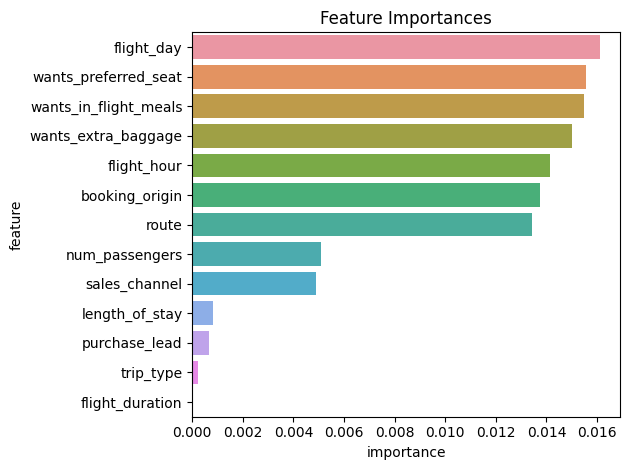

In [54]:
# Visualize the feature importances
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="importance", y="feature", data=feature_importances_df)
# plt.bar(feature_importances_df["feature"], feature_importances_df["importance"])
plt.title("Feature Importances")
# also save in image format
plt.tight_layout()
plt.savefig("feature_importances.png")

plt.show()

